# Libraries

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
from sklearn.metrics import  roc_curve, auc, confusion_matrix, f1_score
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
 # from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from string import ascii_uppercase
from pandas import DataFrame
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline  as imb_pipeline
import joblib
import joblib as jb
from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN


# Blocking some libraries warnings in the ouptputs
warnings.filterwarnings("ignore")
# Fixing a random seed for all the libraries built on numpy
np.random.seed(42)

# Dataset import

Import the dataset:

In [250]:
import pandas as pd

df = pd.read_excel (r'Mathematics in ML/CTG (1).xls')
df = df[1:2127]
df_attr = df.iloc[:, 10:31]
df_class = df.iloc[:, 45]
df = pd.concat([df_attr, df_class], axis=1, join='inner')

In [251]:
names = np.array(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'Fetal state'])

df = df.set_axis(names, axis=1).astype(float)
df['Fetal state'] = df['Fetal state'].astype(int)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal state
1,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
2,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
3,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
4,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
5,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


Replace the 'Suspect' class in 'Pathologic', to use the dataset as in Anomaly Detection tasks:

In [252]:
# df = df.drop(df[df['Fetal state'] == 2].index)

# Replace 'suspect' in 'pathologic'
df['Fetal state'] = df['Fetal state'].replace([2],3)

# Make normals as '0' and pathologic as '1'
df['Fetal state'] = df['Fetal state'].replace([1],0)
df['Fetal state'] = df['Fetal state'].replace([3],1)

In [253]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal state
1,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
2,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
3,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
4,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
5,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


Assinging to matrices:

In [254]:
X = df.iloc[:, 0:21].values
y = df.iloc[:, 21].values


# Data exploration

#### Dataset info

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LB           2126 non-null   float64
 1   AC           2126 non-null   float64
 2   FM           2126 non-null   float64
 3   UC           2126 non-null   float64
 4   DL           2126 non-null   float64
 5   DS           2126 non-null   float64
 6   DP           2126 non-null   float64
 7   ASTV         2126 non-null   float64
 8   MSTV         2126 non-null   float64
 9   ALTV         2126 non-null   float64
 10  MLTV         2126 non-null   float64
 11  Width        2126 non-null   float64
 12  Min          2126 non-null   float64
 13  Max          2126 non-null   float64
 14  Nmax         2126 non-null   float64
 15  Nzeros       2126 non-null   float64
 16  Mode         2126 non-null   float64
 17  Mean         2126 non-null   float64
 18  Median       2126 non-null   float64
 19  Varian

In [256]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Fetal state
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.221543
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.415383
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000


#### Dataset class count

In [257]:
from collections import Counter

counter = Counter(df.iloc[:, 21])
print(counter)

percentages = [counter[0]/len(df), counter[1]/len(df)]
print(f"Percentage of N : {percentages[0]}")
print(f"Percentage of P : {percentages[1]}")



Counter({0: 1655, 1: 471})
Percentage of N : 0.7784571966133584
Percentage of P : 0.2215428033866416


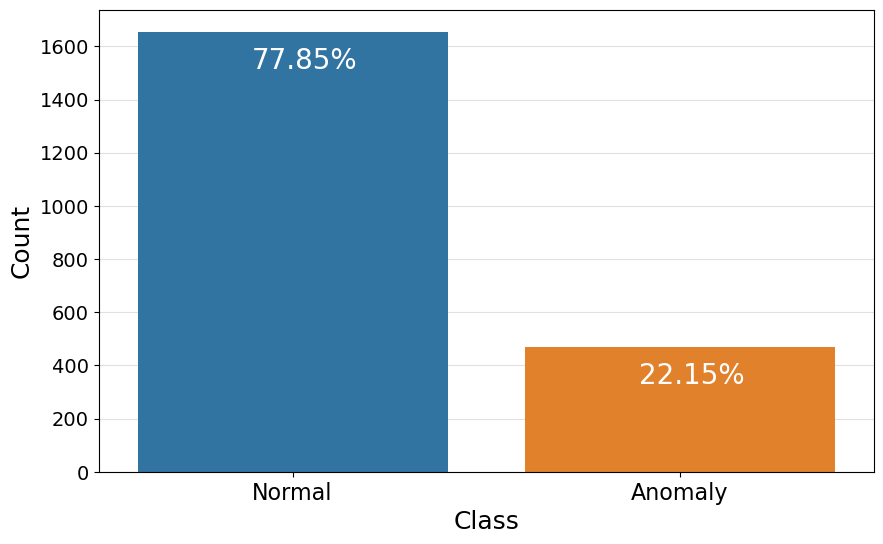

In [259]:
plot = sns.countplot(y)
plt.rcParams['figure.figsize']=(10,6)
plot.grid(axis='y',alpha=0.4)
plot.set_xlabel("Class", fontsize = 18)
plot.set_ylabel("Count", fontsize = 18)
plot.set_xticklabels(['Normal','Anomaly'], fontsize=16)
plot.set_yticklabels([0,200,400,600,800,1000,1200,1400,1600,1800], fontsize=14)

i=0

plot.set_axisbelow(True)


for p in plot.patches:
    height = p.get_height()
    
    percentage = round(percentages[i]*100,2)
    
    str_plot = f'{percentage}%'
    
    plot.text(p.get_x()+p.get_width()/2+0.03, height - 140, str_plot, ha="center", color='white',fontsize=20)
    i += 1

plt.savefig('Mathematics in ML/ClassBins.pdf',bbox_inches='tight')

#### Attribute values distribution per each class

In [ ]:
# attributes names of the dataset
names = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency']

plt.figure(figsize=(14,20))

for i,col in enumerate(names):    
    plt.subplot(7,3,i + 1)    
    sns.kdeplot(df.loc[(df['Fetal state'] == 0), col], label = 'Normal',color="dodgerblue", shade=True, thresh=0.5) # #77DD76, #FF6962, dodgerblue
    # sns.kdeplot(df.loc[(df['Fetal state'] == 2), col], label = 'Suspect', color="#FF6962", shade=True, thresh=0.5)
    sns.kdeplot(df.loc[(df['Fetal state'] == 1), col], label = 'Pathologic', color="darkorange", shade=True, thresh=0.5)

    # plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

# plt.savefig('Mathematics in ML/Distributions.pdf',bbox_inches='tight')
plt.show()

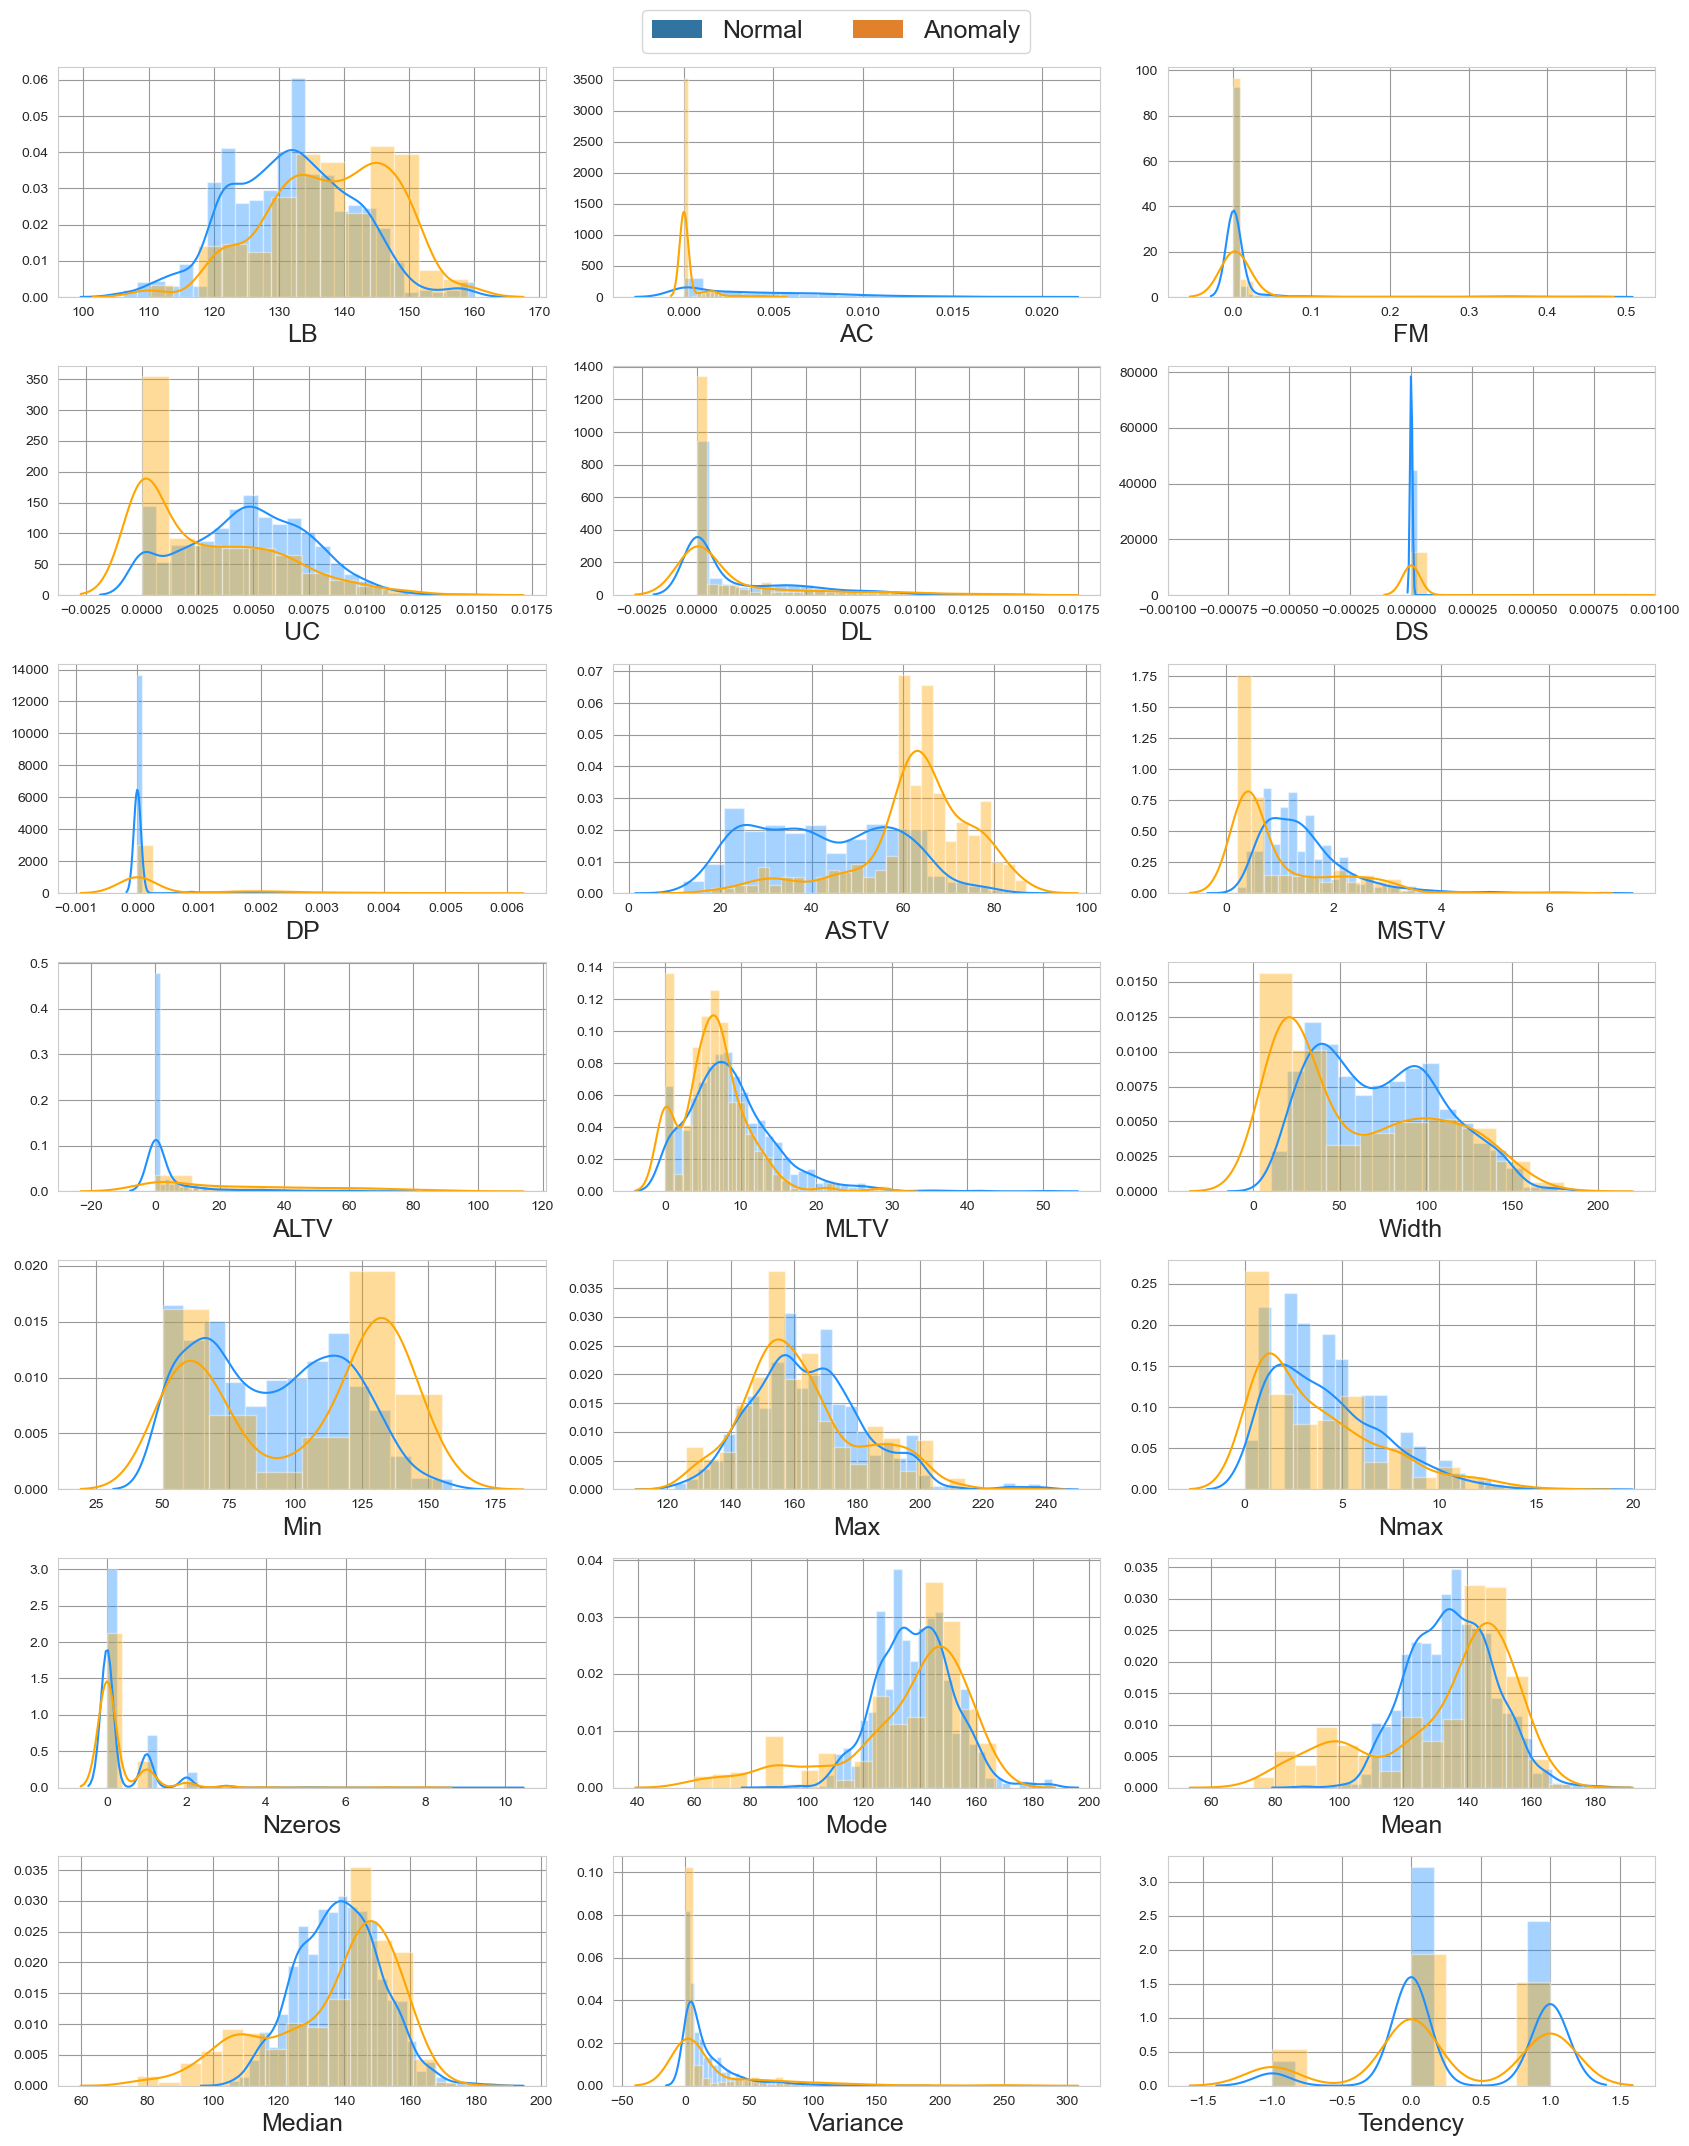

In [291]:
# attributes names of the dataset
names = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency']

plt.figure(figsize=(17,21))

for i,col in enumerate(names):    
    plt.subplot(7,3,i + 1, )    
    sns.distplot(df.loc[(df['Fetal state'] == 0), col], label = 'Normal', color='dodgerblue')
    # sns.distplot(df.loc[(df['Fetal state'] == 2), col], label = 'Suspect', color="#FF6962")
    sns.distplot(df.loc[(df['Fetal state'] == 1), col], label = 'Anomaly', color='orange')
    sns.set_style("whitegrid", {"grid.color": ".6"})
                  
    if col == 'DS':
        plt.xlim(-0.001,0.001)
        
    
    plt.ylabel('')
    plt.xlabel(col,fontsize=18)
    
    # trying to use yellow boxes
    # plt.text(0.5, +1*i, names[i], verticalalignment='top', horizontalalignment='center',
    #      transform=plot.transAxes, color='black', fontsize=16, bbox={'facecolor': 'gold', 'alpha': 0.5, 'pad': 6 } )
    
    plt.tight_layout()

    

# legend in top of the figure    
models = ['Normal', 'Anomaly']
for bar, model in zip(plot.containers[0], models):
    bar.set_label(model)
plt.legend(handles=plot.containers[0][:1],
                 bbox_to_anchor=(0, 1.12), loc='lower left')
# plt.tight_layout(pad=3.0)
plt.legend(handles=plot.containers[0], ncol=len(models),
                 bbox_to_anchor=(-0.68, +8.8), loc='lower center', fontsize=18)


plt.savefig('Mathematics in ML/Distributions2.pdf',bbox_inches='tight')
plt.show()

#### Correlation

In [ ]:
df_attr = df.drop(columns=['Fetal state'])

In [ ]:
cm = df_attr.corr(method='pearson')

mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(16,13), dpi=100)
sns.heatmap(cm, annot=True, fmt='.2', linewidths=.3, mask=mask, cmap='coolwarm')
plt.savefig('Mathematics in ML/Correlation.pdf', bbox_inches='tight')
plt.show()

# Data preprocessing

#### Partitioning

In [265]:
def split_data(X,y, random_state=42):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,
                                                        stratify= y, random_state=random_state)
    return X_train, X_test, y_train, y_test


random_state = 42
ts = 0.25

X_train, X_test, y_train, y_test = split_data(X, y)

#### Scaling

In [266]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#### PCA

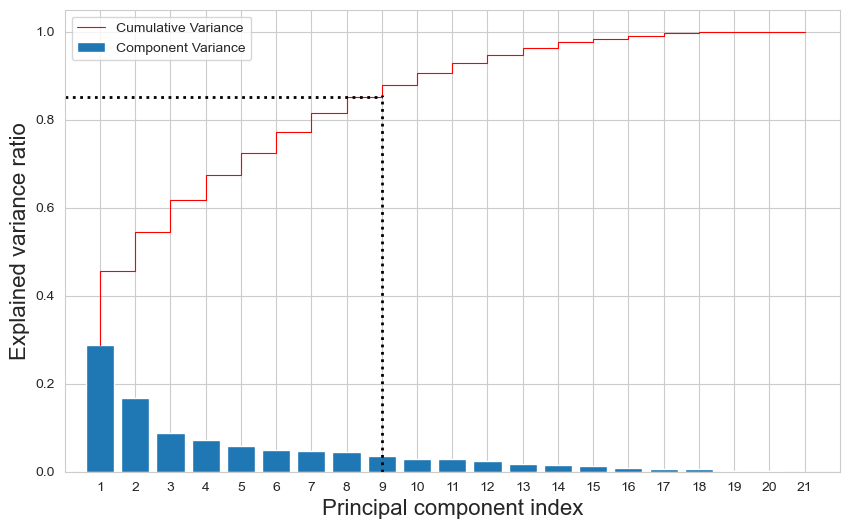

In [285]:
from sklearn.decomposition import PCA


fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(0,22)

pca = PCA(n_components= X_train_scaled.shape[1], random_state=random_state)
X_train_reduced = pca.fit_transform(X_train_scaled)

ax.bar(range(1,len(pca.explained_variance_ratio_ )+1),
         pca.explained_variance_ratio_, 
        label="Component Variance",
        )
ax.step(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Variance",
         linewidth = 0.8
        )

plt.vlines(x=9, ymin=0, ymax=0.855, colors='black', ls=':', lw=2)
plt.hlines(y=0.852, xmin=0, xmax=9, colors='black', ls=':', lw=2)

ax.set_ylabel('Explained variance ratio', fontdict= {"size":16})
ax.set_xlabel('Principal component index', fontdict= {"size":16})
ax.legend(loc='upper left')
ax.set_xticks(np.arange(1,22,1))
plt.savefig('Mathematics in ML/PCA.pdf')
plt.show()

In [482]:
cs = np.cumsum(pca.explained_variance_ratio_)
threshold = .85
mask = cs < threshold
n = sum(mask) + 1
pca_scores = {}
pca_gs_trained_models = {}
print("Number of principal components to have an explained variance ratio of "+ str(threshold) + ":", n)

Number of principal components to have an explained variance ratio of 0.85: 9


### Resampling

##### Under sampling

In [540]:
under = NearMiss(version=3)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

##### Over sampling

In [537]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

##### Combination of under-sampling and over-sampling

In [538]:
smote_enn = SMOTEENN(0.918, random_state=random_state) #0.918,

X_train_under_over, y_train_under_over = smote_enn.fit_resample(X_train, y_train)

##### Plot

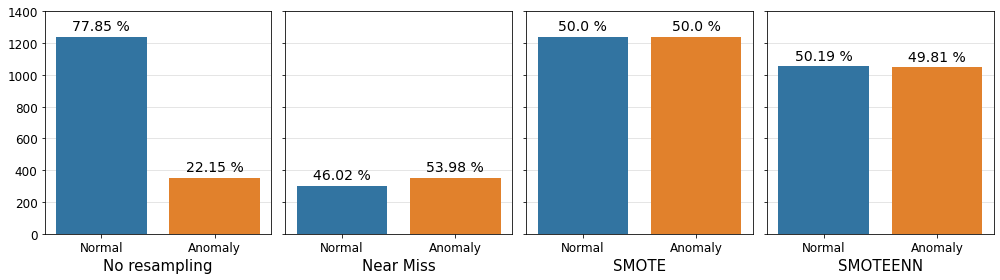

In [539]:
y_list = [y_train, y_train_under, y_train_over, y_train_under_over]
y_list_labels = ['No resampling', 'Near Miss', 'SMOTE', 'SMOTEENN']

plt.figure(figsize=(14,4))

i = 1
for value_raw, label in zip(y_list,y_list_labels):    
    value = pd.DataFrame(value_raw, columns=['Fetal state'])
    
    plt.subplot(1,4,i)
    graph_target = sns.countplot(value_raw) #, palette=['#77DD76','#FF6962'])
    plt.xlabel(label, fontdict= {"size":15})
    plt.ylabel('')
    graph_target.set(xticklabels=['Normal', 'Anomaly'])
    plt.xticks(fontsize=12)
    
    if i==1:
        plt.yticks(fontsize=12)
    else: graph_target.set(yticklabels=[])
    # annotate?
    
    j=0
    for p in graph_target.patches:
        height = p.get_height()

        str_plot = f'{round(100 * value.value_counts()[j]/len(value),2)} %'

        graph_target.text(p.get_x()+p.get_width()/2., height + 40 , str_plot, ha="center", fontsize = 14)
        j = 1
        
    i += 1
    graph_target.set_ylim(0, 1400) 
    graph_target.set_axisbelow(True)
    plt.grid(axis='y',alpha=0.4)


plt.tight_layout()
# plt.savefig('Mathematics in ML/Resampling.pdf')
plt.show()


# Model selection

##### User defined functions:

In [228]:
models = {
    "tree": DecisionTreeClassifier(random_state=random_state),
    "rf" : RandomForestClassifier(random_state=random_state),
    "knn" : KNeighborsClassifier(n_neighbors=9),
    "svc" : SVC(probability=True),
    "logistic": LogisticRegression(random_state=random_state)
} 


param_grids = {
    "tree" : {
        "clf__criterion":["gini", "entropy"],
        "clf__max_depth":[2, 5, 10, 20, 50, 100, None],
    },
    "rf" : {
        "clf__n_estimators":[10, 20, 50, 100, 200],
        "clf__criterion":["gini", "entropy"],
        "clf__max_depth":[2, 5, 10, 20, None],
        "clf__max_features":['sqrt','log2'], # The number of features to consider when looking for the best split
        # "clf__n_jobs": [-1],
    },
    "svc" : {
        "clf__kernel": ['linear', 'rbf', 'poly'],
        "clf__gamma" :['scale', 'auto'],
        "clf__C": [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C
    },
    "knn" : {
        "clf__n_neighbors": [3, 5, 11, 21, 51, 101],
        "clf__weights": ["uniform", "distance"],
        # "clf__algorithm": ["auto", "ball_tree", "kd_tree"],
        "clf__p": [2,3,4] # distance: minkowksi with p=2(euclidean),3,4
        # "clf__n_jobs": [-1],
    }
}

In [13]:
def split_data(X,y, random_state=42):
    """Splits the dataset into train and test set"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,
                                                        stratify= y, random_state=random_state)

    return X_train, X_test, y_train, y_test


def outliers_lof(X,y, n_neighbors=20):
    """Removes the outliers by LocalOutlierFactor"""
    X = np.asarray(X)
    y = np.asarray(y)

    outliers = LocalOutlierFactor(n_neighbors = n_neighbors).fit_predict(X)  # outliers=-1, normals=1   ### n_jobs = -1 for parallel comp
    X = X[outliers == 1, :]
    # print('Number of outliers removed: ', len(outliers)-len(X))
    y = y[outliers == 1]
    return X, y

def make_tests(outliers_options,scaling,pca_options,resampling_options):
    """Defines all the test that must be done as a list of lists"""
    tests = []
    for o in outliers_options:
        for s in scaling:
            for p in pca_options:
                for r in resampling_options:
                    tests.append([o,s,p,r])
    return tests

Pipeline for train and test:

In [17]:
def training_pipeline(df, tests, model, param_grid, random_state=42):
    """Tests all the combinations of Preprocessing and Hyperparameters with 
    K Fold Cross Validation. Then, test on the test set"""
    
    
    y, X = df["Fetal state"], df.drop("Fetal state", axis=1)
    X_train, X_test, y_train, y_test = split_data(X, y, 42)
    
    results = []
    counter = 1

    max_f1 = 0
    
    for curr_test in tests:
        
        outliers_option, scaling, pca, resampling = curr_test
        field_0 = ''
        
        # we save the entire pipeline of objects related to each test
        pipe_steps = [] 
      
        if outliers_option == "LOF":
            field_0 += 'LOF + '
            pipe_steps.append(("outlier", FunctionSampler(func=outliers_lof)))
        
        if scaling:
            # field_0 += 'SCALE + '
            pipe_steps.append(("scale", StandardScaler()))
            
        if pca:
            field_0 += 'PCA + '
            pipe_steps.append(("PCA",PCA(n_components=9, random_state=random_state)))
          
        if resampling:
            field_0 += f'{resampling}'  
            
        if resampling == "NearMiss":
            pipe_steps.append((resampling, NearMiss(version=3))) # 50-50
        elif resampling == "SMOTE":
            pipe_steps.append((resampling,  SMOTE(random_state=random_state) )) # 50-50
        elif resampling == "SMOTEENN":
            pipe_steps.append((resampling, SMOTEENN(0.918, random_state=random_state))) # 50.21 - 49.29

        else: 
            if resampling:
                raise Exception('You are using a resampling strategy not existing in the considered ones: '+resampling)

            
        pipe_steps.append(('clf',model))
        
        pipeline = imb_pipeline(pipe_steps)    
        
        # for each test (i.e. each pipeline) we perform gridsearch and save the best estimator along with the best params
        gridsearch = GridSearchCV(pipeline, param_grid, scoring='f1') #, n_jobs=-1
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_params = gridsearch.best_params_ 
        
        
        # predict on test with best estimator for that test configuration
        y_pred = best_estimator.predict(X_test)
        f1 = round(f1_score(y_test, y_pred),3)
        
        # if this is the best configuration (estimator+pipeline) so far, save the confusion matrix inputs and f1-score
        if f1 > max_f1:
            y_pred_max = y_pred
            y_test_max = y_test
            max_f1 = f1
            
        # clean field_0: remove the last '+' if there is no text on its right
        if field_0.split("+")[-1] == ' ':
            field_0 = field_0[:-3]
            
        curr_result = (field_0, f1, best_params)
        results.append(curr_result)
        
        print(f"Done {counter}/{len(tests)} \t | f1-score : {f1} | >> {field_0}")
        counter += 1

    return results, y_pred_max, y_test_max

def test_pipeline(df, curr_test, model, param_grid, random_state=42):
    """Return the best estimator along with X_test and y_test
    after training with the best combination of 
    Preprocessing and Hyperparameters with 
    K Fold Cross Validation on the test set
    """    
    
    y, X = df["Fetal state"], df.drop("Fetal state", axis=1)
    X_train, X_test, y_train, y_test = split_data(X, y, 42)
    
    print(curr_test)
    
    outliers_option, scaling, pca, resampling = curr_test
    field_0 = ''

    # we save the entire pipeline of objects related to each test
    pipe_steps = [] 

    if outliers_option == "LOF":
        field_0 += 'LOF + '
        pipe_steps.append(("outlier", FunctionSampler(func=outliers_lof)))

    if scaling:
        # field_0 += 'SCALE + '
        pipe_steps.append(("scale", StandardScaler()))

    if pca:
        field_0 += 'PCA + '
        pipe_steps.append(("PCA",PCA(n_components=9, random_state=random_state)))

    if resampling:
        field_0 += f'{resampling}'  
    if resampling == "NearMiss":
        pipe_steps.append((resampling, NearMiss(version=1))) # 50-50
    elif resampling == "SMOTE":
        pipe_steps.append((resampling,  SMOTE(random_state=random_state) )) # 50-50
    elif resampling == "SMOTEENN":
        pipe_steps.append((resampling, SMOTEENN(0.918,random_state=random_state))) # 50.21 - 49.29 # 0.918
    else:
        if resampling:
            raise Exception('You are using a resampling strategy not existing in the considered ones: '+resampling)
                          
    pipe_steps.append(('clf',model))

    pipeline = imb_pipeline(pipe_steps)    

    # perform gridsearch and save the best estimator along with the best params
    gridsearch = GridSearchCV(pipeline, param_grid, scoring='f1') #, n_jobs=-1
    gridsearch.fit(X_train, y_train)
    best_estimator = gridsearch.best_estimator_
    # best_params = gridsearch.best_params_ 

    return best_estimator, X_test, y_test

Plot functions:

In [15]:
def plot_summary(result,y_pred, y_test, color_palette):
    """Plots a barchart with the partial results and a confusion matrix
    on the best estimator with the best preprocessing technique"""
    
    fig = plt.figure(constrained_layout=False,figsize=(14,4))
    gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gs1[0,0:3])
    ax2 = fig.add_subplot(gs1[0,3:5])
    
    
    plot_x = []
    plot_y = []
    
    for r in result:
        plot_x.append(r[1])
        plot_y.append(r[0])

    temp_df = pd.DataFrame({'x':plot_x, 'y' :plot_y}).sort_values(['x'], ascending=False)
    
    sns.barplot(x='x',y='y',data=temp_df, palette=color_palette+'_r',ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="14")
    ax1.set_ylabel("")
    ax1.set_yticklabels(temp_df.y,fontsize=13)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, 
                cmap = color_palette, 
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )
    
    ax2.set_xlabel("Actual values",fontsize="14")
    ax2.set_ylabel("Predicted values",fontsize="14")
    
    return plt

def plot_roc(classifier, classifier_name, X_test, y_test, color):

    # calculate the fpr and tpr for all thresholds vvof the classification
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, color, linewidth=2, label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    # plt.xlim([0,1])
    # plt.ylim([0,1])
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.ylabel('True Positive Rate', size=15)
    plt.xlabel('False Positive Rate', size=15)
    plt.legend(prop={'size': 13})
    plt.grid()
    # plt.savefig('Mathematics in ML/' + classifier_name + '_ROC.pdf', bbox_inches='tight')
    plt.show()
    
def plot_pr(classifier, classifier_name, X_test, y_test, color):

    # calculate the fpr and tpr for all thresholds vvof the classification
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]    
    pr, rec, threshold = metrics.precision_recall_curve(y_test, preds)
    # pr_auc = metrics.auc(rec, pr)
    pr_auc = metrics.average_precision_score(y_test, preds) #approximation of auc

    # method I: plt
    import matplotlib.pyplot as plt
    plt.plot(rec, pr, color, linewidth=2, label = 'AUC = %0.3f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0.22, 0.22],'r--')  # the random classifier is P/(P+N), where P=Anomalies and N=Normals
    # plt.xlim([0,1])
    plt.ylim([-0.05,1.05])
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.ylabel('True Positive Rate', size=15)
    plt.xlabel('False Positive Rate', size=15)
    plt.legend(prop={'size': 13})
    plt.grid()
    # plt.savefig('Mathematics in ML/' + classifier_name + '_ROC.pdf', bbox_inches='tight')
    plt.show()

### Decision Tree

In [26]:
pca_options = [None, True]
scaling = [True]
outliers_options = [None, "LOF"]
resampling_options = [None, "NearMiss", "SMOTE", "SMOTEENN"]

tests = make_tests(outliers_options,scaling,pca_options,resampling_options)

results_tree, y_pred_tree, y_test_tree = training_pipeline(df, tests, models["tree"], param_grids["tree"])

results_tree

Done 1/16 	 | f1-score : 0.832 | >> 
Done 2/16 	 | f1-score : 0.769 | >> NearMiss
Done 3/16 	 | f1-score : 0.825 | >> SMOTE
Done 4/16 	 | f1-score : 0.777 | >> SMOTEENN
Done 5/16 	 | f1-score : 0.702 | >> PCA
Done 6/16 	 | f1-score : 0.626 | >> PCA + NearMiss
Done 7/16 	 | f1-score : 0.77 | >> PCA + SMOTE
Done 8/16 	 | f1-score : 0.786 | >> PCA + SMOTEENN
Done 9/16 	 | f1-score : 0.828 | >> LOF
Done 10/16 	 | f1-score : 0.782 | >> LOF + NearMiss
Done 11/16 	 | f1-score : 0.813 | >> LOF + SMOTE
Done 12/16 	 | f1-score : 0.767 | >> LOF + SMOTEENN
Done 13/16 	 | f1-score : 0.745 | >> LOF + PCA
Done 14/16 	 | f1-score : 0.681 | >> LOF + PCA + NearMiss
Done 15/16 	 | f1-score : 0.788 | >> LOF + PCA + SMOTE
Done 16/16 	 | f1-score : 0.738 | >> LOF + PCA + SMOTEENN


[('', 0.832, {'clf__criterion': 'entropy', 'clf__max_depth': 10}),
 ('NearMiss', 0.769, {'clf__criterion': 'gini', 'clf__max_depth': 10}),
 ('SMOTE', 0.825, {'clf__criterion': 'gini', 'clf__max_depth': 20}),
 ('SMOTEENN', 0.777, {'clf__criterion': 'entropy', 'clf__max_depth': 5}),
 ('PCA', 0.702, {'clf__criterion': 'entropy', 'clf__max_depth': 20}),
 ('PCA + NearMiss', 0.626, {'clf__criterion': 'gini', 'clf__max_depth': 20}),
 ('PCA + SMOTE', 0.77, {'clf__criterion': 'entropy', 'clf__max_depth': 20}),
 ('PCA + SMOTEENN', 0.786, {'clf__criterion': 'gini', 'clf__max_depth': 20}),
 ('LOF', 0.828, {'clf__criterion': 'entropy', 'clf__max_depth': 10}),
 ('LOF + NearMiss', 0.782, {'clf__criterion': 'gini', 'clf__max_depth': 5}),
 ('LOF + SMOTE', 0.813, {'clf__criterion': 'gini', 'clf__max_depth': 20}),
 ('LOF + SMOTEENN',
  0.767,
  {'clf__criterion': 'entropy', 'clf__max_depth': 10}),
 ('LOF + PCA', 0.745, {'clf__criterion': 'entropy', 'clf__max_depth': 10}),
 ('LOF + PCA + NearMiss',
  0.68

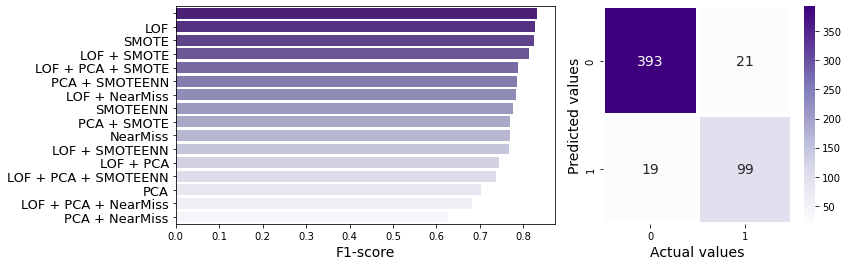

In [27]:
plt_tree = plot_summary(results_tree, y_pred_tree, y_test_tree, 'Purples')
plt_tree.savefig('Mathematics in ML/TREE.pdf', bbox_inches='tight')
plt_tree.show()

###### Best model:

In [28]:
outliers_options = [None]
scaling = [True]
pca_options = [None]
resampling_options = [None]

curr_test = make_tests(outliers_options,scaling,pca_options,resampling_options)[0]
tree, X_test, y_test = test_pipeline(df, curr_test, models["tree"], param_grids["tree"])

[None, True, None, None]


In [29]:
tree

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

### Random Forest

In [24]:
pca_options = [None, True]
scaling = [True]
outliers_options = [None, "LOF"]
resampling_options = [None, "NearMiss", "SMOTE", "SMOTEENN"]

tests = make_tests(outliers_options,scaling,pca_options,resampling_options)

results_rf, y_pred_rf, y_test_rf = training_pipeline(df, tests, models["rf"], param_grids["rf"])

results_rf

Done 1/16 	 | f1-score : 0.906 | >> 
Done 2/16 	 | f1-score : 0.884 | >> NearMiss
Done 3/16 	 | f1-score : 0.87 | >> SMOTE
Done 4/16 	 | f1-score : 0.816 | >> SMOTEENN
Done 5/16 	 | f1-score : 0.814 | >> PCA
Done 6/16 	 | f1-score : 0.843 | >> PCA + NearMiss
Done 7/16 	 | f1-score : 0.835 | >> PCA + SMOTE
Done 8/16 	 | f1-score : 0.791 | >> PCA + SMOTEENN
Done 9/16 	 | f1-score : 0.895 | >> LOF
Done 10/16 	 | f1-score : 0.873 | >> LOF + NearMiss
Done 11/16 	 | f1-score : 0.863 | >> LOF + SMOTE
Done 12/16 	 | f1-score : 0.818 | >> LOF + SMOTEENN
Done 13/16 	 | f1-score : 0.8 | >> LOF + PCA
Done 14/16 	 | f1-score : 0.828 | >> LOF + PCA + NearMiss
Done 15/16 	 | f1-score : 0.812 | >> LOF + PCA + SMOTE
Done 16/16 	 | f1-score : 0.805 | >> LOF + PCA + SMOTEENN


[('',
  0.906,
  {'clf__criterion': 'entropy',
   'clf__max_depth': 20,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 50}),
 ('NearMiss',
  0.884,
  {'clf__criterion': 'entropy',
   'clf__max_depth': 20,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 200}),
 ('SMOTE',
  0.87,
  {'clf__criterion': 'entropy',
   'clf__max_depth': 10,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 100}),
 ('SMOTEENN',
  0.816,
  {'clf__criterion': 'entropy',
   'clf__max_depth': 10,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 200}),
 ('PCA',
  0.814,
  {'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 20}),
 ('PCA + NearMiss',
  0.843,
  {'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 200}),
 ('PCA + SMOTE',
  0.835,
  {'clf__criterion': 'gini',
   'clf__max_depth': 20,
   'clf__max_features': 'sqrt',
   'clf__n_estimators': 200}),
 ('PCA + SMOTEENN'

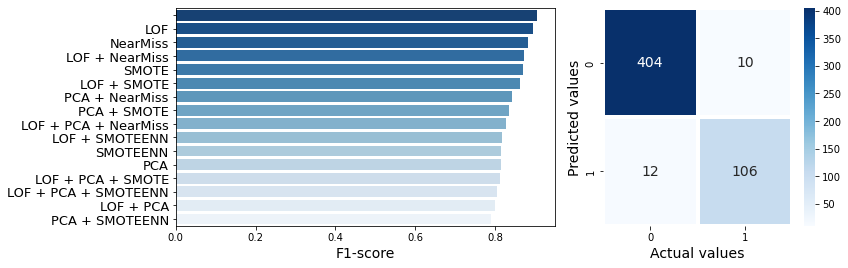

In [25]:
plt_rf = plot_summary(results_rf, y_pred_rf, y_test_rf, 'Blues')
plt_rf.savefig('Mathematics in ML/RF.pdf', bbox_inches='tight')
plt_rf.show()

###### Best model:

In [30]:
outliers_options = [None]
scaling = [True]
pca_options = [None]
resampling_options = [None]

curr_test = make_tests(outliers_options,scaling,pca_options,resampling_options)[0]
rf, X_test, y_test = test_pipeline(df, curr_test, models["rf"], param_grids["rf"])

[None, True, None, None]


In [31]:
rf

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=50, random_state=42))])

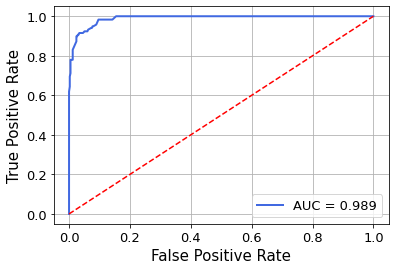

In [32]:
plot_roc(rf, 'rf', X_test, y_test, 'royalblue')

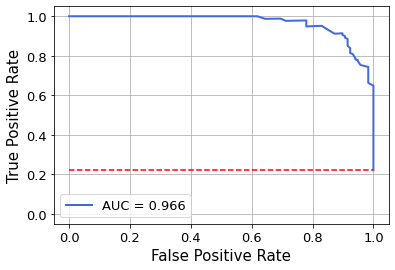

In [33]:
plot_pr(rf, 'rf', X_test, y_test, 'royalblue')

### SVM

In [18]:
pca_options = [None, True]
scaling = [True]
outliers_options = [None, "LOF"]
resampling_options = [None, "NearMiss", "SMOTE", "SMOTEENN"]

tests = make_tests(outliers_options,scaling,pca_options,resampling_options)

results_svm, y_pred_svm, y_test_svm = training_pipeline(df, tests, models["svc"], param_grids["svc"])

Done 1/16 	 | f1-score : 0.87 | >> 
Done 2/16 	 | f1-score : 0.828 | >> NearMiss
Done 3/16 	 | f1-score : 0.856 | >> SMOTE
Done 4/16 	 | f1-score : 0.815 | >> SMOTEENN
Done 5/16 	 | f1-score : 0.825 | >> PCA
Done 6/16 	 | f1-score : 0.823 | >> PCA + NearMiss
Done 7/16 	 | f1-score : 0.787 | >> PCA + SMOTE
Done 8/16 	 | f1-score : 0.787 | >> PCA + SMOTEENN
Done 9/16 	 | f1-score : 0.865 | >> LOF
Done 10/16 	 | f1-score : 0.813 | >> LOF + NearMiss
Done 11/16 	 | f1-score : 0.843 | >> LOF + SMOTE
Done 12/16 	 | f1-score : 0.82 | >> LOF + SMOTEENN
Done 13/16 	 | f1-score : 0.851 | >> LOF + PCA
Done 14/16 	 | f1-score : 0.818 | >> LOF + PCA + NearMiss
Done 15/16 	 | f1-score : 0.811 | >> LOF + PCA + SMOTE
Done 16/16 	 | f1-score : 0.791 | >> LOF + PCA + SMOTEENN


In [19]:
results_svm

[('', 0.87, {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}),
 ('NearMiss',
  0.828,
  {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('SMOTE', 0.856, {'clf__C': 50, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}),
 ('SMOTEENN',
  0.815,
  {'clf__C': 50, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}),
 ('PCA', 0.825, {'clf__C': 100, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('PCA + NearMiss',
  0.823,
  {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}),
 ('PCA + SMOTE',
  0.787,
  {'clf__C': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('PCA + SMOTEENN',
  0.787,
  {'clf__C': 50, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('LOF', 0.865, {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}),
 ('LOF + NearMiss',
  0.813,
  {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('LOF + SMOTE',
  0.843,
  {'clf__C': 20, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}),
 ('LOF + SMOTEENN',
  0.82,
  {'clf__C': 20, 'clf__gamma': 'sca

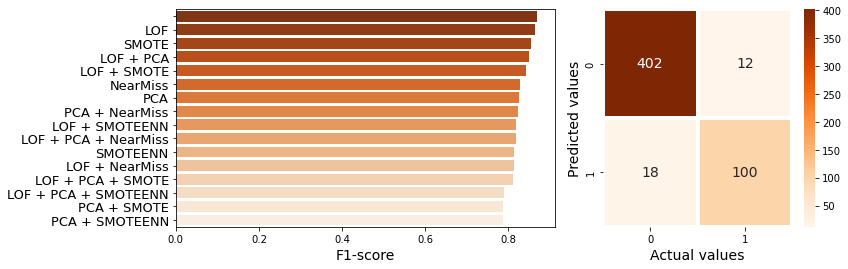

In [20]:
plt_svm = plot_summary(results_svm, y_pred_svm, y_test_svm, 'Oranges')
plt_svm.savefig('Mathematics in ML/SVM.pdf', bbox_inches='tight')
plt_svm.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_svm, drop_intermediate=False)
plt.show()

###### Best model:

In [34]:
outliers_options = [None]
scaling = [True]
pca_options = [None]
resampling_options = [None]

curr_test = make_tests(outliers_options,scaling,pca_options,resampling_options)[0]
svm, X_test, y_test = test_pipeline(df, curr_test, models["svc"], param_grids["svc"])

[None, True, None, None]


In [35]:
svm

Pipeline(steps=[('scale', StandardScaler()),
                ('clf', SVC(C=10, probability=True))])

### KNN

In [229]:
pca_options = [None, True]
scaling = [True]
outliers_options = [None, "LOF"]
resampling_options = [None, "NearMiss", "SMOTE", "SMOTEENN"]

tests = make_tests(outliers_options,scaling,pca_options,resampling_options)

results_knn, y_pred_knn, y_test_knn = training_pipeline(df, tests, models["knn"], param_grids["knn"])

Done 1/16 	 | f1-score : 0.781 | >> 
Done 2/16 	 | f1-score : 0.83 | >> NearMiss
Done 3/16 	 | f1-score : 0.81 | >> SMOTE
Done 4/16 	 | f1-score : 0.759 | >> SMOTEENN
Done 5/16 	 | f1-score : 0.786 | >> PCA
Done 6/16 	 | f1-score : 0.824 | >> PCA + NearMiss
Done 7/16 	 | f1-score : 0.777 | >> PCA + SMOTE
Done 8/16 	 | f1-score : 0.747 | >> PCA + SMOTEENN
Done 9/16 	 | f1-score : 0.778 | >> LOF
Done 10/16 	 | f1-score : 0.817 | >> LOF + NearMiss
Done 11/16 	 | f1-score : 0.806 | >> LOF + SMOTE
Done 12/16 	 | f1-score : 0.77 | >> LOF + SMOTEENN
Done 13/16 	 | f1-score : 0.773 | >> LOF + PCA
Done 14/16 	 | f1-score : 0.823 | >> LOF + PCA + NearMiss
Done 15/16 	 | f1-score : 0.77 | >> LOF + PCA + SMOTE
Done 16/16 	 | f1-score : 0.751 | >> LOF + PCA + SMOTEENN


In [230]:
results_knn

[('', 0.781, {'clf__n_neighbors': 5, 'clf__p': 3, 'clf__weights': 'distance'}),
 ('NearMiss',
  0.83,
  {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__weights': 'distance'}),
 ('SMOTE',
  0.81,
  {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'}),
 ('SMOTEENN',
  0.759,
  {'clf__n_neighbors': 3, 'clf__p': 3, 'clf__weights': 'distance'}),
 ('PCA',
  0.786,
  {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'}),
 ('PCA + NearMiss',
  0.824,
  {'clf__n_neighbors': 11, 'clf__p': 4, 'clf__weights': 'distance'}),
 ('PCA + SMOTE',
  0.777,
  {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}),
 ('PCA + SMOTEENN',
  0.747,
  {'clf__n_neighbors': 11, 'clf__p': 4, 'clf__weights': 'distance'}),
 ('LOF',
  0.778,
  {'clf__n_neighbors': 5, 'clf__p': 3, 'clf__weights': 'distance'}),
 ('LOF + NearMiss',
  0.817,
  {'clf__n_neighbors': 11, 'clf__p': 3, 'clf__weights': 'distance'}),
 ('LOF + SMOTE',
  0.806,
  {'clf__n_neighbors': 3, 'clf__p': 3, 'clf__weights': 'd

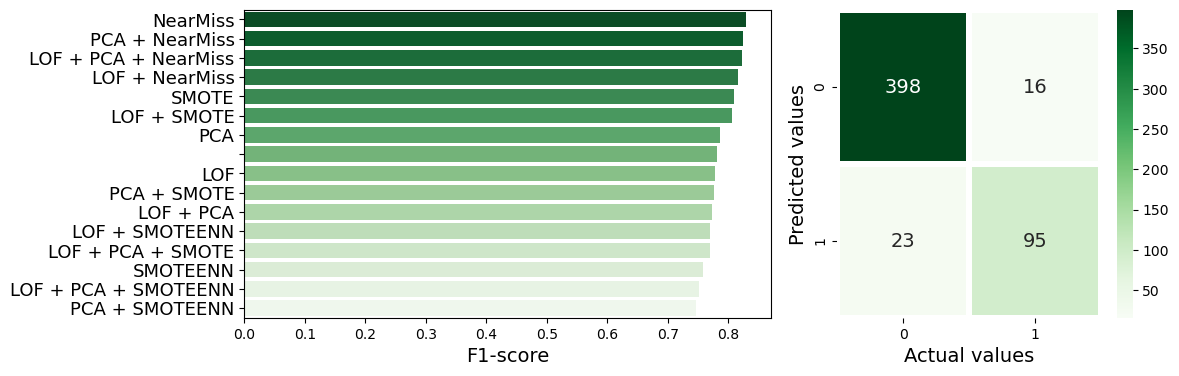

In [233]:
plt_knn = plot_summary(results_knn, y_pred_knn, y_test_knn, 'Greens')
plt_knn.savefig('Mathematics in ML/KNN.pdf', bbox_inches='tight')
plt_knn.show()

###### Best model:

In [235]:
outliers_options = [None]
scaling = [True]
pca_options = [None]
resampling_options = ['NearMiss']

curr_test = make_tests(outliers_options,scaling,pca_options,resampling_options)[0]
knn, X_test, y_test = test_pipeline(df, curr_test, models["knn"], param_grids["knn"])

[None, True, None, 'NearMiss']


In [236]:
knn

Pipeline(steps=[('scale', StandardScaler()), ('NearMiss', NearMiss()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=51, weights='distance'))])

### Best models pipelines comparison:

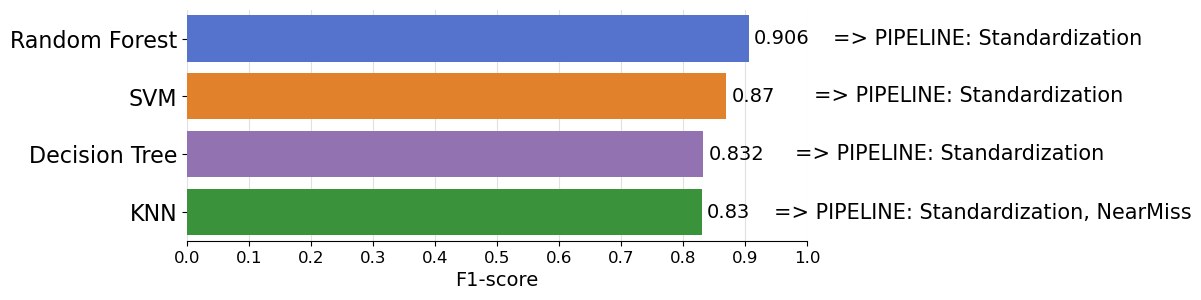

In [243]:
f1_scores = [0.906, 0.87, 0.830, 0.832]
models = ['Random Forest', 'SVM', 'KNN', 'Decision Tree']

temp_df = pd.DataFrame({'x':f1_scores, 'y' :models}).sort_values(['x'], ascending=False)


plt.figure(figsize=(8,3))

ax = sns.barplot(x='x',y='y',data=temp_df, palette=['royalblue', '#ff7f0e', '#9467bd', '#2ca02c'])

sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)

sns.set_style({'axes.facecolor':'white', 'grid.color': '.7'}) 
plt.rc('axes', axisbelow=True)
plt.xlim([0,1])
plt.xlabel("F1-score", fontsize="14")
plt.ylabel("")
plt.xticks(np.arange(0,1.1,0.1), fontsize='12')
plt.yticks(fontsize=16)
plt.grid(axis='x', alpha=0.4)
plt.bar_label(ax.containers[0], fontsize='14', padding=4)

plt.text(1.54, 0.831, '=> PIPELINE: Standardization',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.text(1.51, 0.585, '=> PIPELINE: Standardization',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.text(1.48, 0.335, '=> PIPELINE: Standardization',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.text(1.62, 0.08, '=> PIPELINE: Standardization, NearMiss',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.savefig("Mathematics in ML/models_f1scores.pdf", bbox_inches='tight')
plt.show()

##### ROC curve

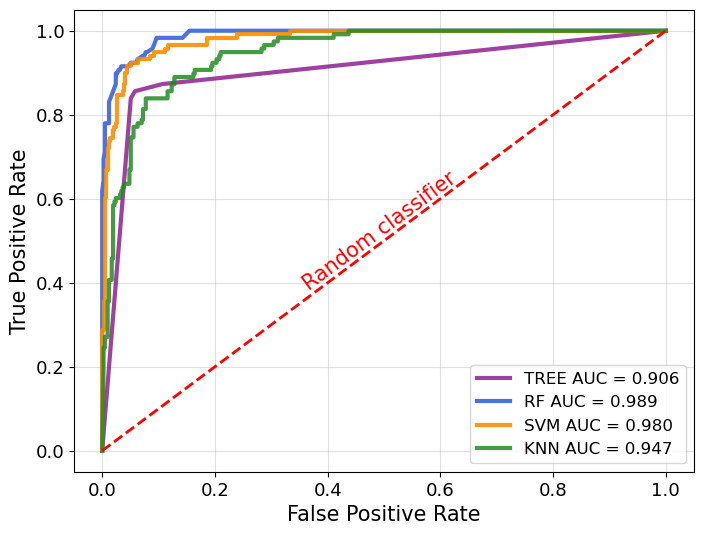

In [246]:
# plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,6)

# TREE: calculate the fpr and tpr for all thresholds of the classification
probs_tree = tree.predict_proba(X_test)
preds_tree = probs_tree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test, preds_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

# RF: calculate the fpr and tpr for all thresholds of the classification
probs_rf = rf.predict_proba(X_test)
preds_rf = probs_rf[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

# SVM: calculate the fpr and tpr for all thresholds of the classification
probs_svm = svm.predict_proba(X_test)
preds_svm = probs_svm[:,1]
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

# KNN: calculate the fpr and tpr for all thresholds of the classification
probs_knn = knn.predict_proba(X_test)
preds_knn = probs_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)


# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr_tree, tpr_tree, 'purple', linewidth=3, alpha=0.75, label = 'TREE AUC = %0.3f' % roc_auc_tree)
plt.plot(fpr_rf, tpr_rf, 'royalblue', linewidth=3, alpha=0.95, label = 'RF AUC = %0.3f' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, 'darkorange', linewidth=3, alpha=0.9, label = 'SVM AUC = %0.3f' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, 'forestgreen', linewidth=3, alpha=0.85, label = 'KNN AUC = %0.3f' % roc_auc_knn)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', alpha=1, linewidth=2)
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('True Positive Rate', size=15)
plt.xlabel('False Positive Rate', size=15)
plt.legend(prop={'size': 12})
# plt.xscale('log')
plt.grid(alpha=0.4)

plt.text(0.58, 0.90, 'Random classifier', rotation=36.5,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', alpha=1, fontsize=15)

plt.savefig('Mathematics in ML/ROC.pdf', bbox_inches='tight')
plt.show()


##### PR comparison

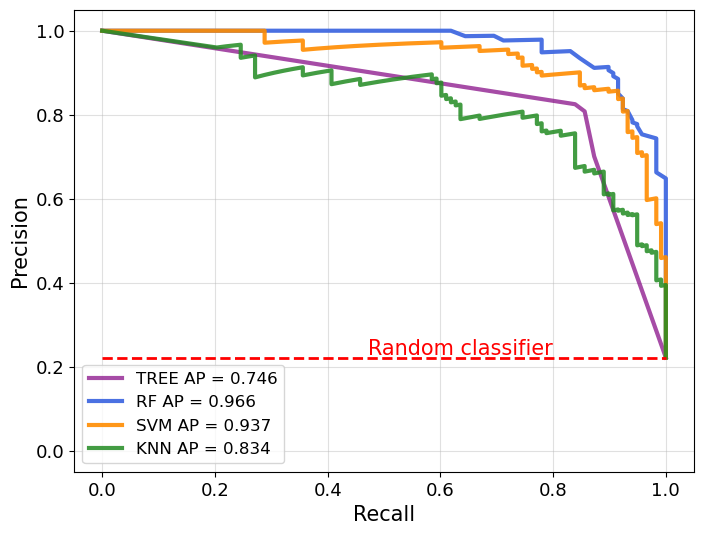

In [247]:
# TREE: calculate the fpr and tpr for all thresholds of the classification
probs_tree = tree.predict_proba(X_test)
preds_tree = probs_tree[:,1]
pr_tree, rec_tree, threshold_tree = metrics.precision_recall_curve(y_test, preds_tree)
pr_auc_tree = metrics.average_precision_score(y_test, preds_tree)

# RF: calculate the fpr and tpr for all thresholds of the classification
probs_rf = rf.predict_proba(X_test)
preds_rf = probs_rf[:,1]
pr_rf, rec_rf, threshold_rf = metrics.precision_recall_curve(y_test, preds_rf)
pr_auc_rf = metrics.average_precision_score(y_test, preds_rf)

# SVM: calculate the fpr and tpr for all thresholds of the classification
probs_svm = svm.predict_proba(X_test)
preds_svm = probs_svm[:,1]
pr_svm, rec_svm, threshold_svm = metrics.precision_recall_curve(y_test, preds_svm)
pr_auc_svm = metrics.average_precision_score(y_test, preds_svm)

# KNN: calculate the fpr and tpr for all thresholds of the classification
probs_knn = knn.predict_proba(X_test)
preds_knn = probs_knn[:,1]
pr_knn, rec_knn, threshold_knn = metrics.precision_recall_curve(y_test, preds_knn)
pr_auc_knn = metrics.average_precision_score(y_test, preds_knn)


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)

plt.plot(rec_tree, pr_tree, 'purple', linewidth=3, alpha=0.7, label = 'TREE AP = %0.3f' % pr_auc_tree)
plt.plot(rec_rf, pr_rf, 'royalblue', linewidth=3, alpha=0.95, label = 'RF AP = %0.3f' % pr_auc_rf)
plt.plot(rec_svm, pr_svm, 'darkorange', linewidth=3, alpha=0.9, label = 'SVM AP = %0.3f' % pr_auc_svm)
plt.plot(rec_knn, pr_knn, 'forestgreen', linewidth=3, alpha=0.85, label = 'KNN AP = %0.3f' % pr_auc_knn)

plt.legend(loc = 'lower right')
plt.plot([0,1], [0.22, 0.22],'r--', linewidth=2)
# plt.xlim([0,1])
plt.ylim([-0.05,1.05])
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('Precision', size=15)
plt.xlabel('Recall', size=15)
plt.legend(loc='lower left', prop={'size': 12})
# plt.xscale('log')
plt.grid(alpha=0.4)

plt.text(0.73, 0.62, 'Random classifier',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='r', fontsize=15)

plt.savefig('Mathematics in ML/PR.pdf', bbox_inches='tight')
plt.show()